<a href="https://colab.research.google.com/github/zackives/upenn-cis-2450/blob/main/lab6_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark and Data Visualization



In [ ]:
!pip install sparkmagic

In [ ]:
%load_ext sparkmagic.magics

The sparkmagic.magics extension is already loaded. To reload it, use:
  %reload_ext sparkmagic.magics


In [ ]:
%spark add -s spark_session -l python -u http://ec2-44-203-104-41.compute-1.amazonaws.com -a cis545-livy -p onion -t Basic_Access

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
2,application_1728425306049_0003,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


An error was encountered:
Session with name 'spark_session' already exists. Please delete the session first if you intend to replace it.


In [ ]:
# %spark delete -s spark_session

In [ ]:
# If you ever need to restart, you may need to...
#%spark delete -s spark_session
#OR just factory reset runtime under the runtime tab
# %spark delete -s spark_session

In [ ]:
%%spark

from pyspark.sql.types import *

# create a Schema

ratings_schema = StructType([
    StructField("Id", IntegerType(), nullable=True),
    StructField("Title", StringType(), nullable=True),
    StructField("Price", FloatType(), nullable=True),
    StructField("User_id", StringType(), nullable=True),
    StructField("profileName", StringType(), nullable=True),
    StructField("review/helpfulness",StringType(),nullable =True),
    StructField("review/score", FloatType(), nullable=True),
    StructField("review/time",IntegerType(),nullable=True),
    StructField("review/summary",StringType(),nullable=True),
    StructField("review/text",StringType(),nullable=True),
])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
from pyspark import SparkFiles
review_url = "https://penn-cis545-files.s3.amazonaws.com/Books_rating.csv"
sc.addFile(review_url)
path  = SparkFiles.get('download')
goodreads_review_data_sdf = spark.read.csv('file://'+SparkFiles.get('Books_rating.csv'),header=True,schema = ratings_schema,quote='\"',escape='\"')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Let's print out the first few rows to see how the data looks like in tabular form
goodreads_review_data_sdf.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1882931173|Its Only Art If I...| null| AVCGYZL8FQQTD|Jim of Oz "jim-of...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|
| 826414346|Dr. Seuss: Americ...| null|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|
| 826414346|Dr. Seuss: Americ...| null|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0| 1078790400|Essential for eve...|If people become ...|
| 826414346|Dr. Seuss: Ameri

Clean the data by dropping any missing values from `Id`, `Title`, `review/helpfulness`, `review/score`

In [ ]:
%%spark

cleaned_data_sdf = goodreads_review_data_sdf.dropna(subset=["Id", "Title", "review/helpfulness", "review/score"])
cleaned_data_sdf.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1882931173|Its Only Art If I...| null| AVCGYZL8FQQTD|Jim of Oz "jim-of...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|
| 826414346|Dr. Seuss: Americ...| null|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|
| 826414346|Dr. Seuss: Americ...| null|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0| 1078790400|Essential for eve...|If people become ...|
| 826414346|Dr. Seuss: Ameri

In [ ]:
%%spark


# Create SQL-accesible table
cleaned_data_sdf.createOrReplaceTempView("ratings_data")
# Declare SQL query to be excecuted
query = '''SELECT *
           FROM ratings_data
           ORDER BY Id
           LIMIT 10'''

# Save the output sdf of spark.sql() as answer_sdf
answer_sdf = spark.sql(query)
answer_sdf.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|     Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+-------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1047604|        Aurora Leigh| null| A8G9GETA2OLMZ|       P. Schumacher|               9/9|         5.0| 1130457600|As If Jane Eyre W...|Having been broug...|
|1047604|        Aurora Leigh| null|A1ZQ1LUQ9R6JHZ|     Daniel Robinson|             12/13|         5.0|  990316800|An amazing achiev...|E.B.B. set out to...|
|1047604|        Aurora Leigh| null|A2SOBQ2AP72BNY|Nancy L. Pridgen ...|               2/2|         1.0| 1310947200|Aurora Leigh from...|I bought this boo...|
|1047604|        Aurora Leigh| null| ALSOPPC6O

In [ ]:
%%spark

cleaned_data_sdf.withColumnRenamed('review/helpfulness', 'helpfulness')
cleaned_data_sdf.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1882931173|Its Only Art If I...| null| AVCGYZL8FQQTD|Jim of Oz "jim-of...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|
| 826414346|Dr. Seuss: Americ...| null|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|
| 826414346|Dr. Seuss: Americ...| null|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0| 1078790400|Essential for eve...|If people become ...|
| 826414346|Dr. Seuss: Ameri

Grouping and Aggregate Operations

In [ ]:
%%spark

# Calculate the number of reviews and the average review score
reviewCount = cleaned_data_sdf.groupBy("Id", "Title").agg({'review/score': 'count'})
reviewCount.show() # count
avgReviews = cleaned_data_sdf.groupBy("Id", "Title").agg({'review/score': 'avg'})
avgReviews.show() # average

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+-------------------+
|        Id|               Title|count(review/score)|
+----------+--------------------+-------------------+
| 517222876|The Greatest Cat ...|                  3|
| 679807713|Two-Legged, Four-...|                  2|
|1568954530|The Collected Sto...|                  3|
| 590523465|Welcome Home, Mar...|                 10|
| 929539095|The Palatine Fami...|                  1|
| 893030821|Being a Medical T...|                  1|
| 890877904|Four Paws, Five D...|                 39|
| 892552719|A Brief Conversio...|                  1|
| 486259501|Fantasy in F Mino...|                  3|
| 385413017|         Fumblerules|                  4|
| 486406679|103 Great Poems: ...|                  3|
| 192816926|He Knew He Was Ri...|                 21|
| 130198552|Introductory Circ...|                  9|
| 887347983|              Liliom|                  1|
| 871541785|Over the Edge: Th...|                  1|
| 814651623|Dining with Phar

Renaming the columns to `review_count` and `average_review`

In [ ]:
%%spark

reviewCount = reviewCount.withColumnRenamed('count(review/score)', 'num_reviews')
avgReviews = avgReviews.withColumnRenamed('avg(review/score)', 'average_review')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Ordering

In [ ]:
%%spark

# Get top 10 Ids with the highest average reviews
top_10_reviews = avgReviews.orderBy('average_review', ascending=False).limit(10)
top_10_reviews.show()
# Get bottom 10 Ids with the lowest average reviews
bottom_10_reviews = avgReviews.orderBy('average_review', ascending=True).limit(10)
bottom_10_reviews.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+--------------+
|        Id|               Title|average_review|
+----------+--------------------+--------------+
| 198462778|Read Write Inc. P...|           5.0|
| 967761905|Rapid Descent : D...|           5.0|
| 810118750|Calvin O. Schrag ...|           5.0|
|1572181680|2006 Gulf Coast R...|           5.0|
| 312195486|       Ghost Dancing|           5.0|
| 205336078|Point/Counterpoin...|           5.0|
|1885983441|Leopardi: A Study...|           5.0|
|1930916752|              Origin|           5.0|
| 810151391|   I Will Say Beauty|           5.0|
|1565791444|Texas Reflections...|           5.0|
+----------+--------------------+--------------+

+---------+--------------------+--------------+
|       Id|               Title|average_review|
+---------+--------------------+--------------+
|425077845|Slocum's Good Dee...|           1.0|
|805947515|Excuse Me, Which ...|           1.0|
|899578020|Learning the Basi...|           1.0|
|517118319|Percy Bysshe S

Data Visualization

Visualize the top and bottom book titles in a graph. Must first convert it back into pandas, then use the libraries such as `matplotlib` or `seaborn` to visualize the results.

In [ ]:
%spark -o top_10_reviews

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%spark -o bottom_10_reviews

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
top_10_reviews.head()
bottom_10_reviews.head()

,Id,Title,average_review
0,1840223081,Dictionary of Modern English Grammar (Wordswor...,1.0
1,787273023,Smart Notebook: A Guide to Effective Note Taking,1.0
2,658017233,Resumes for Law Careers,1.0
3,965957551,HOW TO INSTALL LINUX for Red Hat Linux,1.0
4,26559722,Come Follow Me 2,1.0


Helpfulness Ratio and Data Visualization

In [ ]:
%%spark

from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf, col

def helpfulness_ratio(helpfulness):
    if not helpfulness:
        return None
    numerator, denominator = map(int, helpfulness.split('/'))
    return numerator / denominator if denominator != 0 else 0.0

helpfulness_ratio_udf = udf(helpfulness_ratio, FloatType())

ratio_helpfulness = cleaned_data_sdf.withColumn("helpfulness_ratio", helpfulness_ratio_udf(col("review/helpfulness")))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark

ratio_helpfulness.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+-----------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|helpfulness_ratio|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+-----------------+
|1882931173|Its Only Art If I...| null| AVCGYZL8FQQTD|Jim of Oz "jim-of...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|              1.0|
| 826414346|Dr. Seuss: Americ...| null|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|              1.0|
| 826414346|Dr. Seuss: Americ...| null|A3UH4UZ4RSVO82|        John Granger|             10/11|      

In [ ]:
%%spark

helpfulnessAvg = ratio_helpfulness.groupBy("Id", "Title").agg({'helpfulness_ratio': 'avg'})
helpfulnessAvg.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+----------------------+
|        Id|               Title|avg(helpfulness_ratio)|
+----------+--------------------+----------------------+
| 517222876|The Greatest Cat ...|  0.047619049747784935|
| 679807713|Two-Legged, Four-...|    0.6666666716337204|
|1568954530|The Collected Sto...|   0.31111112236976624|
| 590523465|Welcome Home, Mar...|    0.4138661354780197|
| 929539095|The Palatine Fami...|      0.95652174949646|
+----------+--------------------+----------------------+
only showing top 5 rows

In [ ]:
%%spark
helpfulnessAvg = helpfulnessAvg.withColumnRenamed('avg(helpfulness_ratio)', 'avg_helpfulness')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark

top_10_helpful = helpfulnessAvg.orderBy('avg_helpfulness', ascending=False).limit(10)
top_10_helpful.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+---------------+
|        Id|               Title|avg_helpfulness|
+----------+--------------------+---------------+
| 861905032|The Visitor's Gui...|            1.0|
| 945397526|Frontier Physicia...|            1.0|
| 525469494|The Song Shoots O...|            1.0|
|1931055084|Islands, Islands,...|            1.0|
|1586400193|Reader's Text New...|            1.0|
| 911019561|Totline Storytime...|            1.0|
| 838428118| English in Action 1|            1.0|
| 253202582|Classic Chinese N...|            1.0|
|1561678279|Lexicon for Lover...|            1.0|
|1886157316|In the Knees of t...|            1.0|
+----------+--------------------+---------------+

In [ ]:
%spark -o top_10_helpful

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_20439/2230983335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


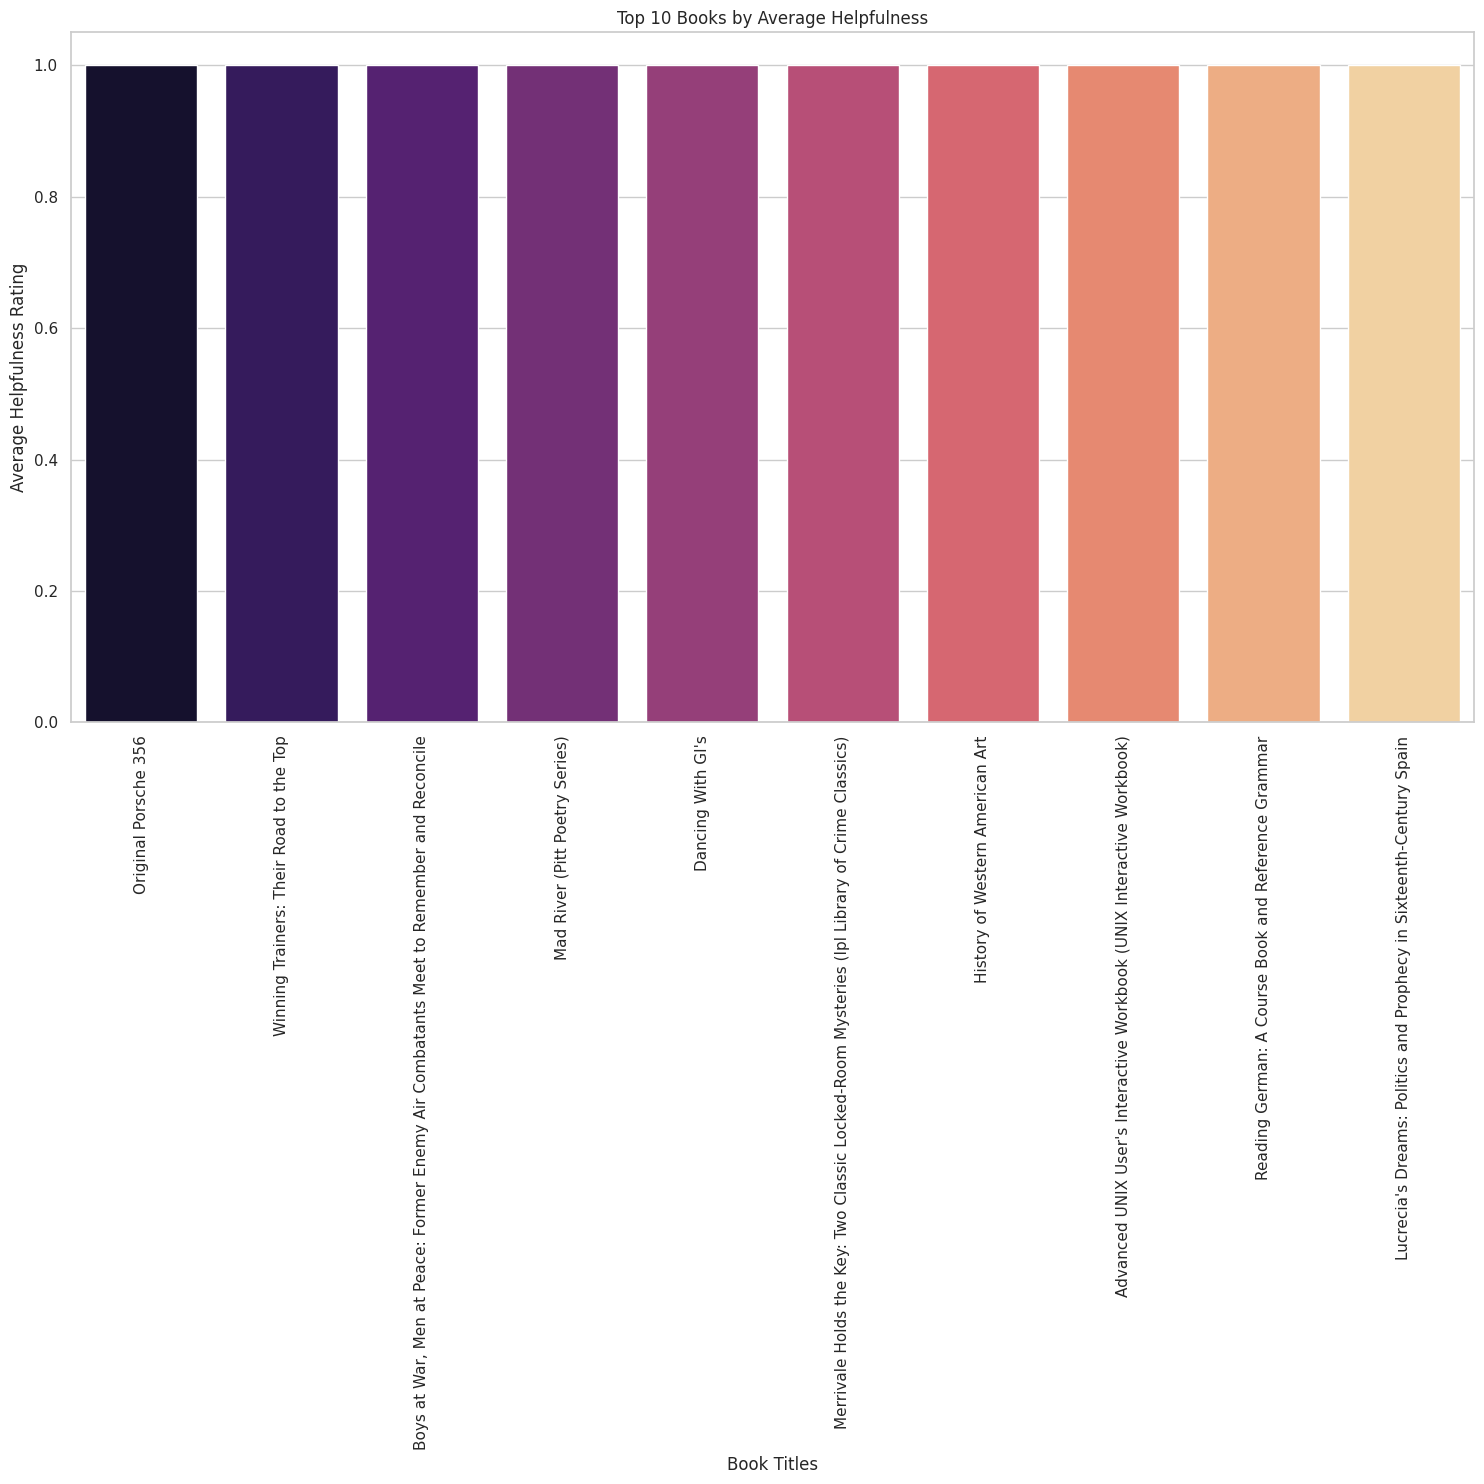

In [ ]:
plt.figure(figsize=(15, 15))
sns.set(style="whitegrid")

ax = sns.barplot(
    x="Title",
    y="avg_helpfulness",
    data=top_10_helpful,
    palette="magma"
    )

plt.xlabel("Book Titles")
plt.ylabel("Average Helpfulness Rating")
plt.xticks(rotation=90)
plt.title("Top 10 Books by Average Helpfulness")

plt.tight_layout()
plt.show()